# Predicting Flight Delays

---

In [64]:
# General Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# R1.1 Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

#R1.2 Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#R1.3 Imports
from sklearn.ensemble import RandomForestClassifier


## Data Preperation

Little data preperation is needed for these models as the initial cleaning is perfect for the needs. There will just be different subsets for each.


In [65]:
df = pd.read_csv("../data/ORD_11_21-11-22_model.csv")

In [66]:
# test = True # this is a temporary flag so it can run quickly
# if test:
#     df = df.iloc[0:1001]

## Logistic Regression (2 Classes)

In [67]:
# Two class subset
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DestAirportSeqID', 'DepDelay', 'ArrTimeBlk', 'Distance', 'TaxiOut', 'CRSDepTime',
 'CRSArrTime', 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['ArrDel15']

In [68]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)


In [69]:
fit = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight={0:15, 1:85}, random_state=15).fit(x_train, y_train)

In [70]:
y_pred = fit.predict(x_test)
y_prob = fit.predict_proba(x_test)
y_prob = y_prob[:,1] # want the positive values

Text(0.5, 1.0, 'Arrival Delay Confusion Matrix (Logistic Regression)')

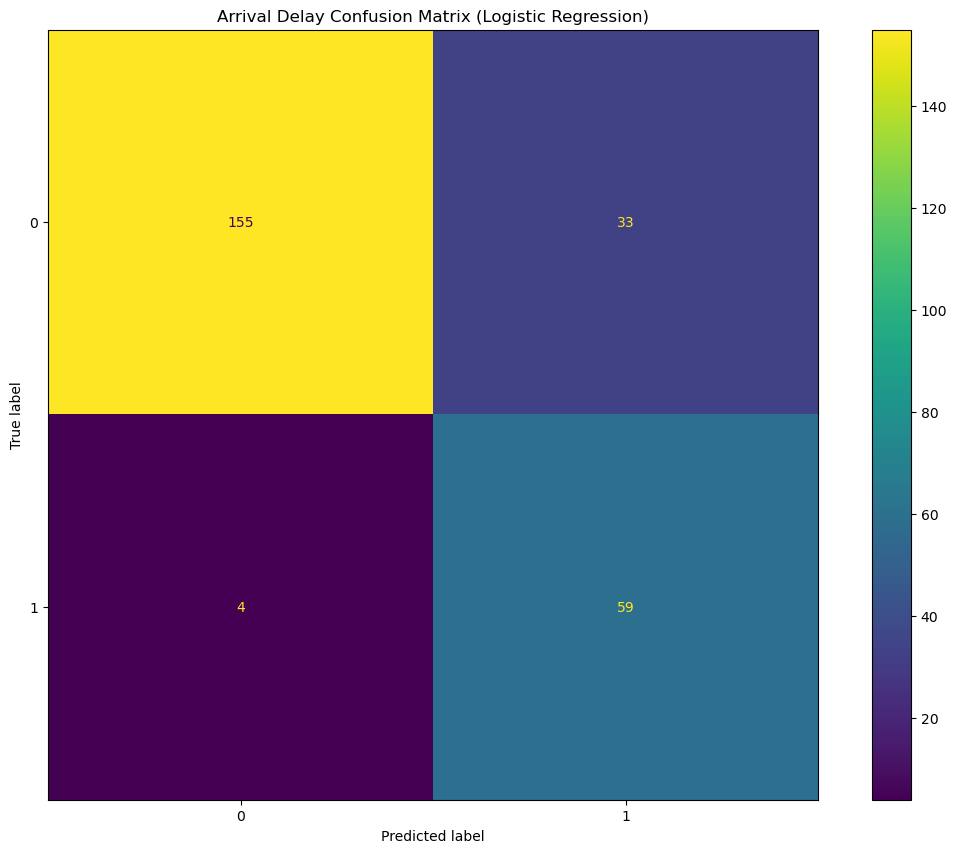

In [71]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Arrival Delay Confusion Matrix (Logistic Regression)")

In [72]:
print(f"Accuracy of Model: {accuracy_score(y_test, y_pred)}")
print(f"Precision of Model: {precision_score(y_test, y_pred)}")
print(f"Recall of Model: {recall_score(y_test, y_pred)}")

Accuracy of Model: 0.852589641434263
Precision of Model: 0.6413043478260869
Recall of Model: 0.9365079365079365


AUC Score: 0.9559270516717324


Text(0.5, 1.0, 'Arrival Delay ROC Curve (Random Forrest Decision Tree)')

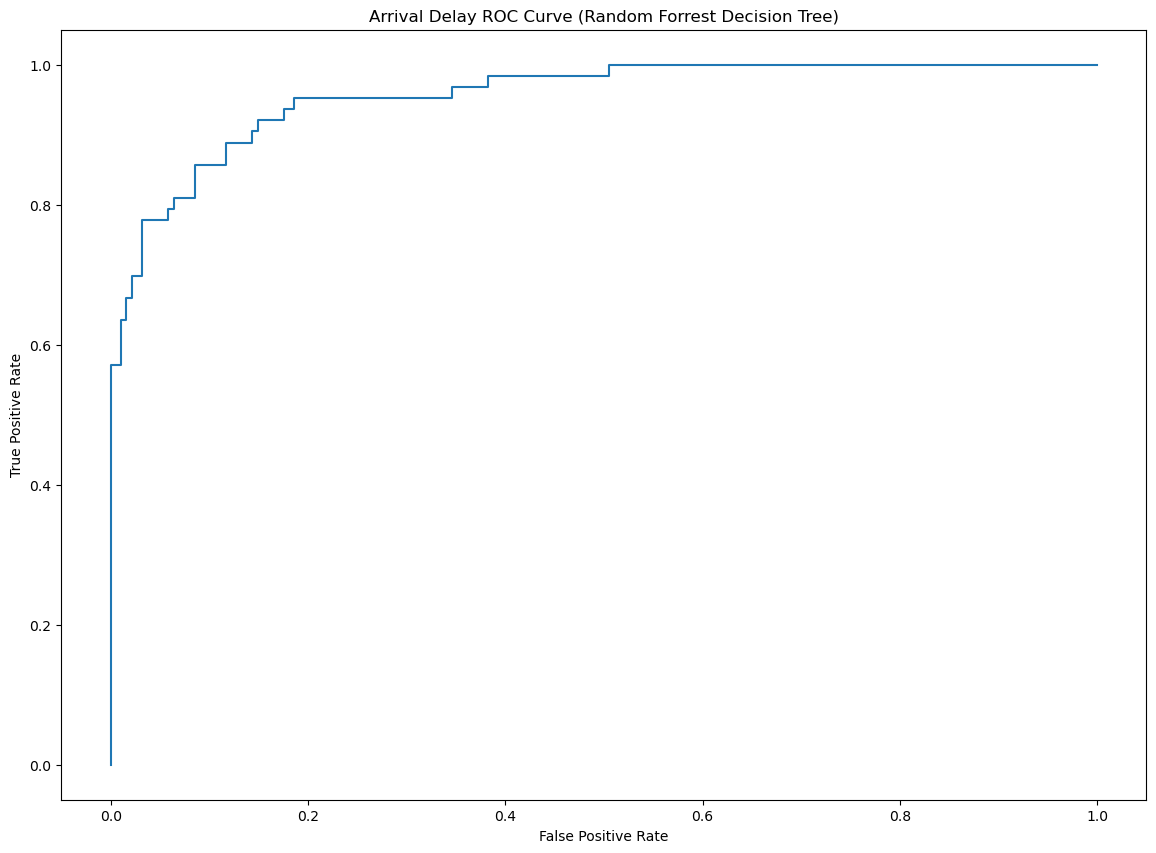

In [73]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print(f"AUC Score: {auc}")

ax1.plot(fpr, tpr)
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.set_title("Arrival Delay ROC Curve (Random Forrest Decision Tree)")

Text(0.5, 1.0, 'Arrival Delay Precision Vs. Recall (Logistic Regression)')

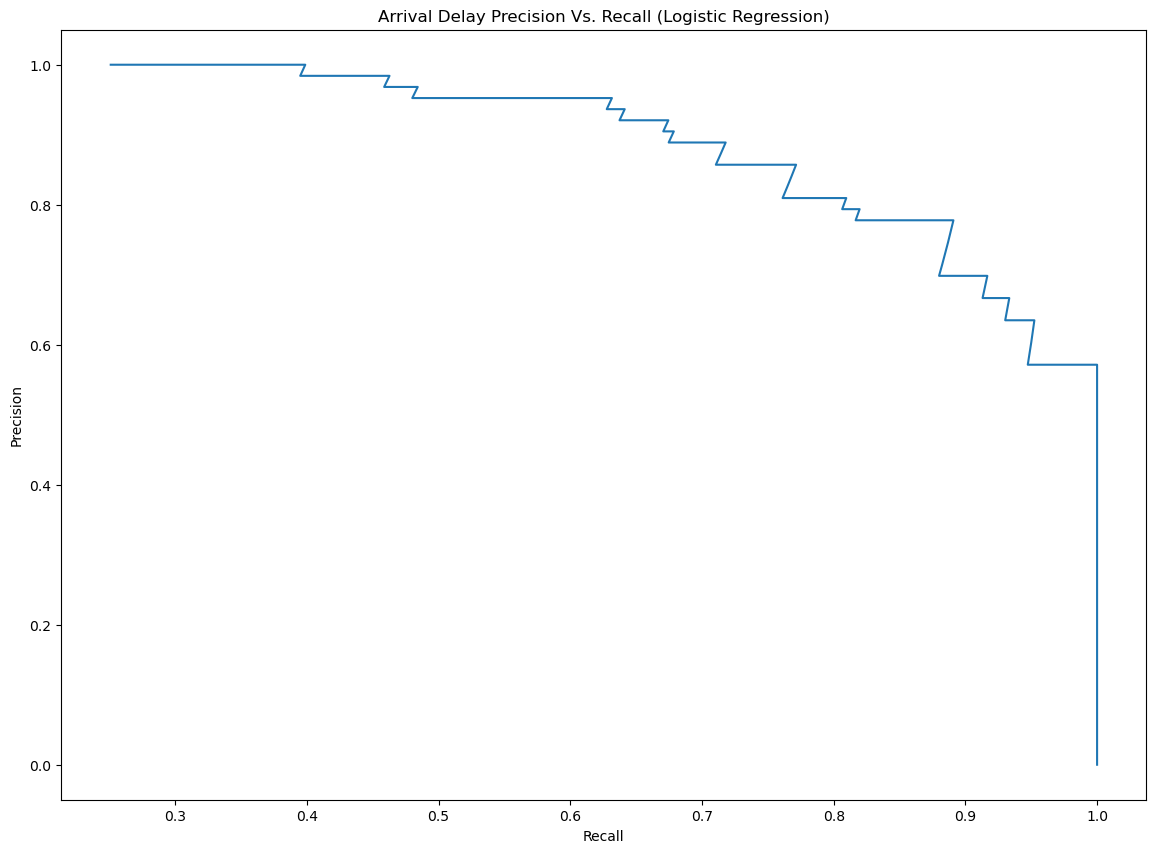

In [74]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
prec, recall, _ = precision_recall_curve(y_test, y_prob)

ax1.plot(prec, recall)
ax1.set_ylabel('Precision')
ax1.set_xlabel('Recall')
ax1.set_title("Arrival Delay Precision Vs. Recall (Logistic Regression)")

## Logistic Regression (Multiple Classes)

In [75]:
# Multi class subset **overwriting variables**
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'TaxiOut', 'CRSDepTime',
 'CRSArrTime', 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['ArrivalDelayGroups']

In [76]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [77]:
# fit = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight={0:15, 1:85}, random_state=15).fit(x_train, y_train)
fit = LogisticRegression(solver='sag', max_iter=10000, multi_class='multinomial').fit(x_train, y_train)

In [78]:
y_pred = fit.predict(x_test)
y_prob = fit.predict_proba(x_test)
y_prob = y_prob[:,1] # want the positive values

Text(0.5, 1.0, 'Arrival Delay Group Confusion Matrix (Logistic Regression)')

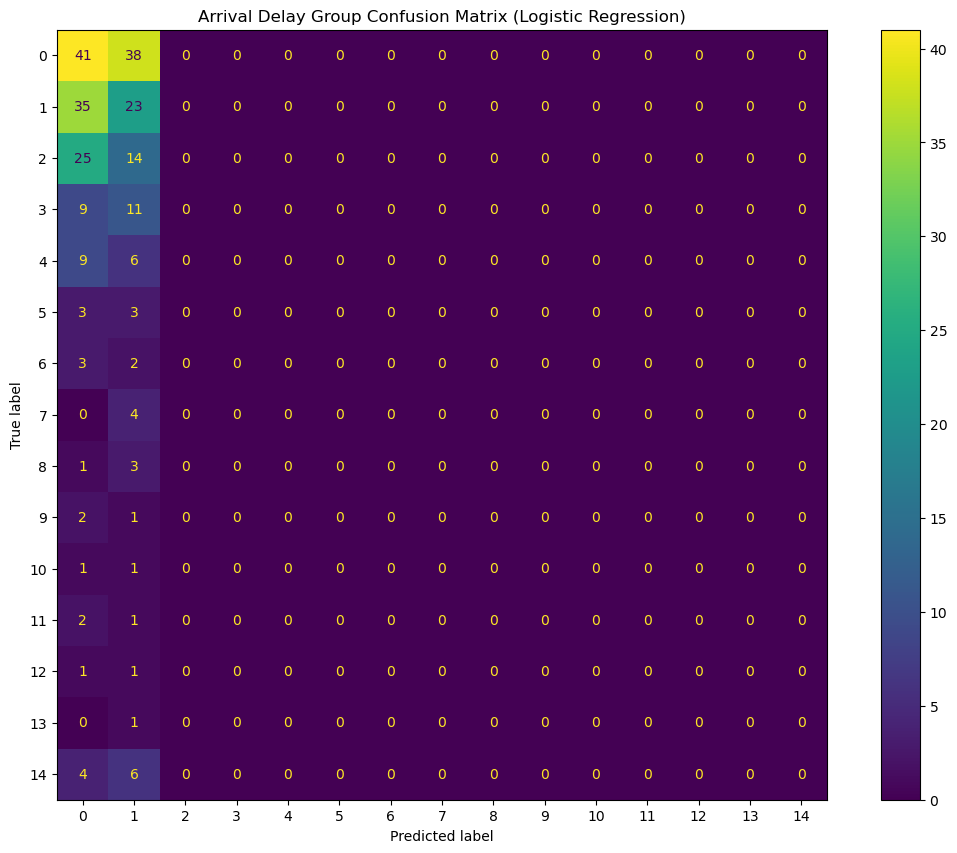

In [79]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Arrival Delay Group Confusion Matrix (Logistic Regression)")

In [80]:
print(f"Accuracy of Model: {accuracy_score(y_test, y_pred)}")

Accuracy of Model: 0.2549800796812749


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       0.30      0.52      0.38        79
        -1.0       0.20      0.40      0.27        58
         0.0       0.00      0.00      0.00        39
         1.0       0.00      0.00      0.00        20
         2.0       0.00      0.00      0.00        15
         3.0       0.00      0.00      0.00         6
         4.0       0.00      0.00      0.00         5
         5.0       0.00      0.00      0.00         4
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         3
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         3
        10.0       0.00      0.00      0.00         2
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00        10

    accuracy                           0.25       251
   macro avg       0.03      0.06      0.04       251
weighted avg       0.14   

c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forrest Decision Tree (2 Class)

In [82]:
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'TaxiOut', 'CRSDepTime', 'CRSArrTime',
 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['ArrDel15']

In [83]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [84]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=2)
df_x, df_y = oversample.fit_resample(df_x, df_y)

In [85]:
rfc = RandomForestClassifier(random_state=15).fit(x_train, y_train)

In [86]:
rfc_pred = rfc.predict(x_test)

In [87]:
print(f"Accuracy of Model: {accuracy_score(y_test, rfc_pred)}")

Accuracy of Model: 0.9402390438247012


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00       0.0
        -1.0       0.00      0.00      0.00       0.0
         0.0       0.00      0.00      0.00     178.0
         1.0       0.00      0.00      0.00      73.0

    accuracy                           0.00     251.0
   macro avg       0.00      0.00      0.00     251.0
weighted avg       0.00      0.00      0.00     251.0



c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\en

Text(0.5, 1.0, 'Arrival Delay Confusion Matrix (Random Forrest Decision Tree)')

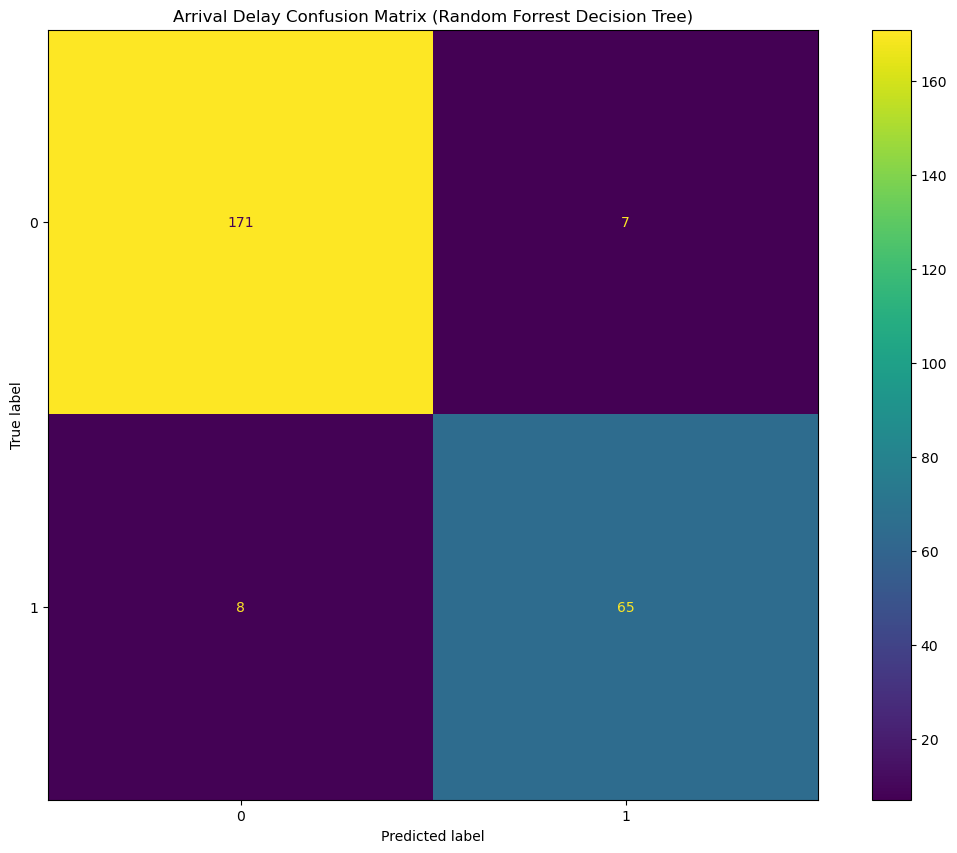

In [89]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, rfc_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Arrival Delay Confusion Matrix (Random Forrest Decision Tree)")

Text(0.5, 1.0, 'Arrival Delay  Random Forest Variable Importance')

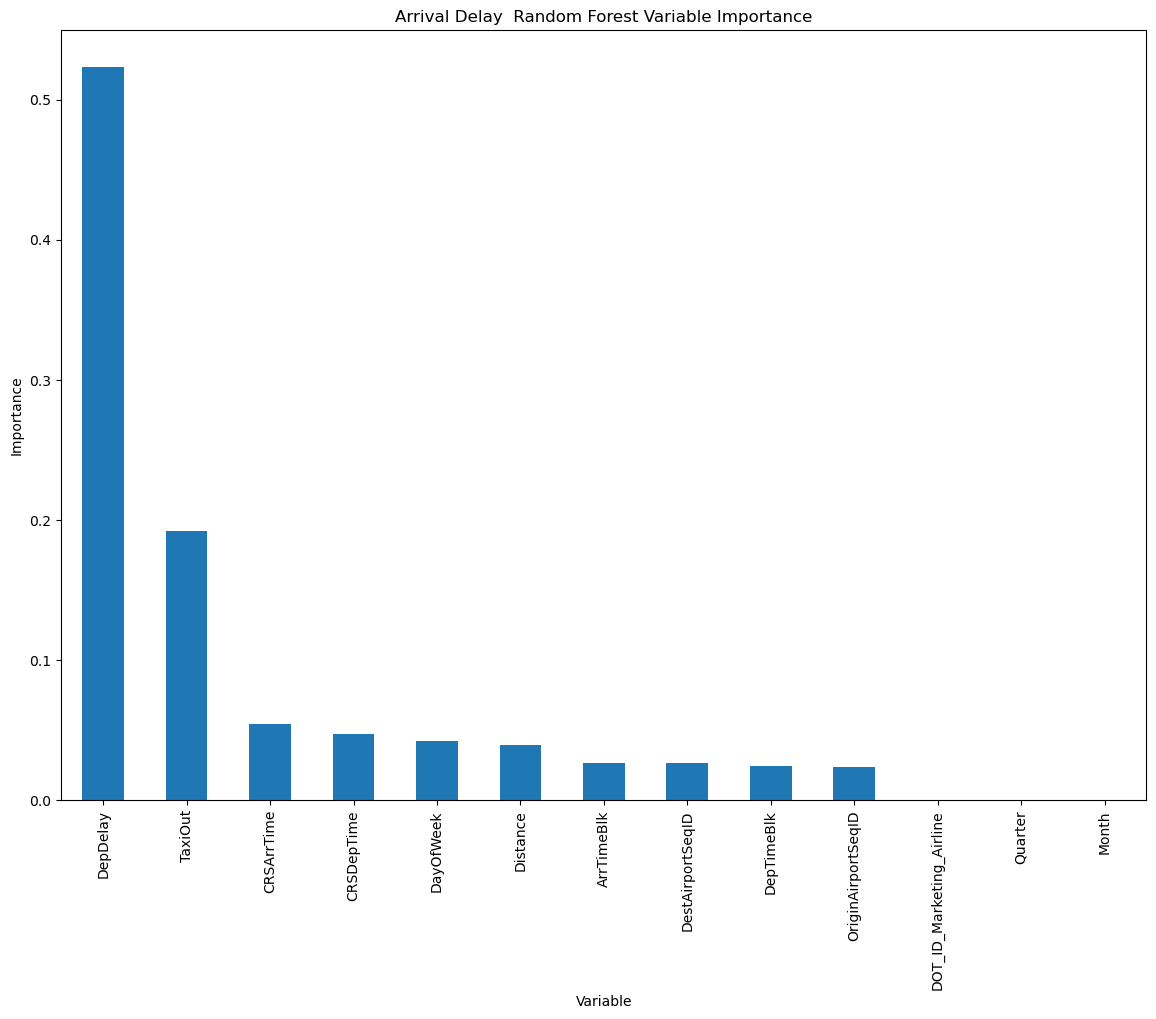

In [90]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
feature_importance = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_importance.plot.bar(ax=ax1)
ax1.set_xlabel("Variable")
ax1.set_ylabel("Importance")
ax1.set_title("Arrival Delay  Random Forest Variable Importance")

## Random Forest Decision Tree (Multi-Class)

In [91]:
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'TaxiOut', 'CRSDepTime', 'CRSArrTime',
 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['ArrivalDelayGroups']

In [92]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [93]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=2)
df_x, df_y = oversample.fit_resample(df_x, df_y)

In [94]:
rfc = RandomForestClassifier(random_state=15).fit(x_train, y_train)

In [95]:
rfc_pred = rfc.predict(x_test)

In [96]:
print(f"Accuracy of Model: {accuracy_score(y_test, rfc_pred)}")

Accuracy of Model: 0.4900398406374502


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       0.26      0.51      0.35        70
        -1.0       0.24      0.41      0.31        68
         0.0       0.00      0.00      0.00        48
         1.0       0.00      0.00      0.00        13
         2.0       0.00      0.00      0.00        12
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         6
         6.0       0.00      0.00      0.00         5
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         5
        10.0       0.00      0.00      0.00         2
        12.0       0.00      0.00      0.00         6

    accuracy                           0.25       251
   macro avg       0.04      0.07      0.05       251
weighted avg       0.14      0.25      0.18       251



c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Arrival Delay Group Confusion Matrix (Random Forrest Decision Tree)')

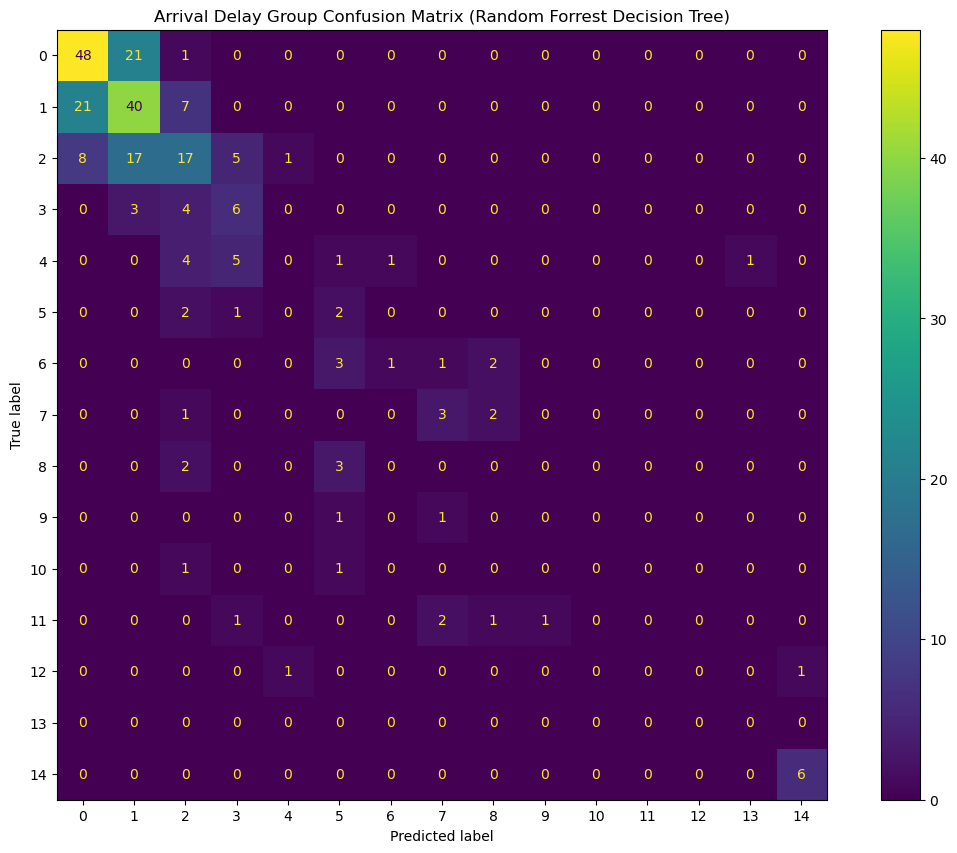

In [98]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, rfc_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Arrival Delay Group Confusion Matrix (Random Forrest Decision Tree)")

Text(0.5, 1.0, 'Arrival Delay Group Random Forest Variable Importance')

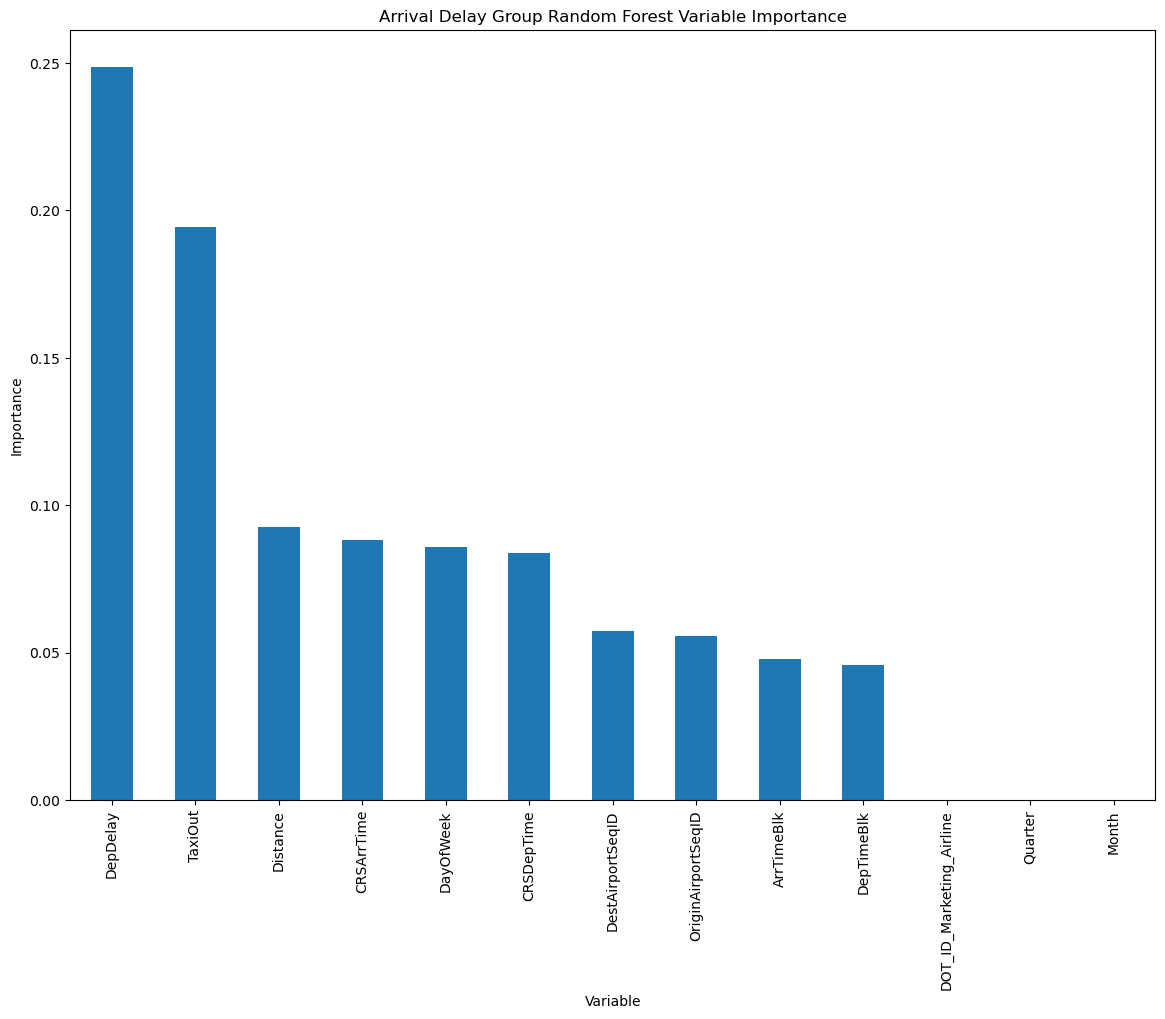

In [99]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
feature_importance = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_importance.plot.bar(ax=ax1)
ax1.set_xlabel("Variable")
ax1.set_ylabel("Importance")
ax1.set_title("Arrival Delay Group Random Forest Variable Importance")